# Task1:Wuzzaf Scrapping Data for ITs jobs Full pages

# Name: Wessam Hamdy Atya

## import libraries

In [1]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import csv

## scrapping data from web

In [2]:
x=list(range(131))
limit=2600
keys=0
urls=[]
for i in x:
    key=keys
    y = str(key)
    url='https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start='+y
    urls.append(url)
    #print(urls)
    #print(url)
    keys+=20
    if key==limit:
        break
#print(urls[2])

### i thinked alot about a separator to separate the data with
### i have created private symbol from internet (✫)
### we have 4 columns (job_title, company_names, company_locations,  job_description)

In [3]:
f= open("ًwuzzaf10_8_2021.csv","w",encoding='utf-8')
header = "job_title✫company_names✫company_locations✫job_description\n"
f.write(header) 
for url in urls:
    print(url)    
    client=urlopen(url)
    html= client.read()
    client.close()
    soup = bs(html,"html.parser")
    containers = soup.find_all("div",{"class":"result-wrp row"}) 
    for container in containers:
    
        job_job = container.findAll("h2",{"class":"job-title"})
        job_title = job_job[0].text.strip()    
        
        company_name = container.findAll("span",{"class":"company-name"})
        company_names = company_name[0].text.strip()     
        
        company_location=container.findAll("span",{"class":"location location-desktop"})
        company_locations = company_location[0].text.strip()  
        
        job_type = container.findAll("div",{"class":"job-details"})
        job_description = job_type[0].text.strip()
        job_description = ' '.join(job_description.split())
        
        f.write(job_title + "✫" + company_names + "✫" + company_locations + "✫" + job_description + "\n")    
        
f.close()

https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=0
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=20
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=40
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=60
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=80
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=100
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=120
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=140
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=160
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=180
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=200
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=220
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=240
https://wuzzuf.net/a/IT-Software-Development-Jobs-in-Egypt?start=260
https://wuzzuf.net/a/IT-Software-Develop

# ---------------------------------------------------------------------------------------------

In [519]:
import numpy as np
import pandas as pd 

### read 2021 data

In [777]:
df21 = pd.read_csv("ًwuzzaf10_8_2021.csv", sep='delimiter')

<ipython-input-777-e3fe30b71f5e>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df21 = pd.read_csv("ًwuzzaf10_8_2021.csv", sep='delimiter')


In [778]:
# check columns name
df21.columns

Index(['job_title✫company_names✫company_locations✫job_description'], dtype='object')

In [779]:
# check data
df21

,job_title✫company_names✫company_locations✫job_description
0,Business Development Specialist - Upper Egypt✫...
1,Senior/Intermediate .NET Core Developer (Remot...
2,Senior Software Developer✫Bnsights✫- New Cairo...
3,Software Developer / Desktop Development✫ITS✫-...
4,Senior Software Developer -Dynamics 365...✫Cro...
...,...
2613,Fixed Shift- English Technical Support Agent✫S...
2614,"Storage, Backup and Virtualization Consultant✫..."
2615,"XD Designer✫RMG✫- New Cairo, Cairo✫Part Time ·..."
2616,Instructor CND & CEH & CPENT✫New Horizons✫- Ca...


In [780]:
# split the data with the symbol we have created before
df21 = df21['job_title✫company_names✫company_locations✫job_description'].str.split('✫',expand = True)

In [781]:
# check data again
df21

,0,1,2,3
0,Business Development Specialist - Upper Egypt,golden,"- Aswan, Egypt",Full Time · Experienced · 2+ Yrs of Exp · Busi...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"- Cairo, Egypt",Full Time · Experienced · 4+ Yrs of Exp · Soft...
2,Senior Software Developer,Bnsights,"- New Cairo, Cairo",Full Time · Experienced · 6-10 Yrs of Exp · So...
3,Software Developer / Desktop Development,ITS,"- Nasr City, Cairo",Full Time · Entry Level · 0-2 Yrs of Exp · Com...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"- New Cairo, Cairo",Full Time · Experienced · 4-12 Yrs of Exp · AL...
...,...,...,...,...
2613,Fixed Shift- English Technical Support Agent,Sykes Enterprises,"- Maadi, Cairo",Full Time · Entry Level · 1-4 Yrs of Exp · Cus...
2614,"Storage, Backup and Virtualization Consultant",Global Brands,"- New Cairo, Cairo",Full Time · Experienced · 3+ Yrs of Exp · Comp...
2615,XD Designer,RMG,"- New Cairo, Cairo",Part Time · Experienced · 5-7 Yrs of Exp · Ado...
2616,Instructor CND & CEH & CPENT,New Horizons,"- Cairo, Egypt",Part Time · Experienced · 2-5 Yrs of Exp · Pen...


### looks well!

### change columns name

In [782]:
# rename columns
df21 = df21.rename(columns={0: 'job_title'})
df21 = df21.rename(columns={1: 'company_names'})
df21 = df21.rename(columns={2: 'company_locations'})
df21 = df21.rename(columns={3: 'job_description'})

In [783]:
df21

,job_title,company_names,company_locations,job_description
0,Business Development Specialist - Upper Egypt,golden,"- Aswan, Egypt",Full Time · Experienced · 2+ Yrs of Exp · Busi...
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"- Cairo, Egypt",Full Time · Experienced · 4+ Yrs of Exp · Soft...
2,Senior Software Developer,Bnsights,"- New Cairo, Cairo",Full Time · Experienced · 6-10 Yrs of Exp · So...
3,Software Developer / Desktop Development,ITS,"- Nasr City, Cairo",Full Time · Entry Level · 0-2 Yrs of Exp · Com...
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"- New Cairo, Cairo",Full Time · Experienced · 4-12 Yrs of Exp · AL...
...,...,...,...,...
2613,Fixed Shift- English Technical Support Agent,Sykes Enterprises,"- Maadi, Cairo",Full Time · Entry Level · 1-4 Yrs of Exp · Cus...
2614,"Storage, Backup and Virtualization Consultant",Global Brands,"- New Cairo, Cairo",Full Time · Experienced · 3+ Yrs of Exp · Comp...
2615,XD Designer,RMG,"- New Cairo, Cairo",Part Time · Experienced · 5-7 Yrs of Exp · Ado...
2616,Instructor CND & CEH & CPENT,New Horizons,"- Cairo, Egypt",Part Time · Experienced · 2-5 Yrs of Exp · Pen...


In [784]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_title          2618 non-null   object
 1   company_names      2618 non-null   object
 2   company_locations  2618 non-null   object
 3   job_description    2618 non-null   object
dtypes: object(4)
memory usage: 81.9+ KB


## make new column city to help in analysis

### i have noticed that city is followed by comma so i used it to split

In [785]:
df21["city"] = df21['company_locations'].str.split(",",expand=True)[0]

#### quality issue i fined ( - ) in location column

In [786]:
df21["city"] = df21['city'].str.strip("-")

In [787]:
df21['company_locations'] = df21['company_locations'].str.strip("-")

In [788]:
df21.head(10)

,job_title,company_names,company_locations,job_description,city
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",Full Time · Experienced · 2+ Yrs of Exp · Busi...,Aswan
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",Full Time · Experienced · 4+ Yrs of Exp · Soft...,Cairo
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",Full Time · Experienced · 6-10 Yrs of Exp · So...,New Cairo
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",Full Time · Entry Level · 0-2 Yrs of Exp · Com...,Nasr City
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",Full Time · Experienced · 4-12 Yrs of Exp · AL...,New Cairo
5,Vodafone Egypt Customer Care Advisor,Vodafone Egypt,"Maadi, Cairo",Full Time · Entry Level · 0-3 Yrs of Exp · Adv...,Maadi
6,Senior Software Developer - Java,CrossWorkers,"New Cairo, Cairo",Full Time · Experienced · 4+ Yrs of Exp · Info...,New Cairo
7,Software Developer - As/400 Developer,Target Recruitment & HR Solutions,"Cairo, Egypt",Full Time · Experienced · 5-10 Yrs of Exp · So...,Cairo
8,IT Developer,Confidential,"New Cairo, Cairo",Full Time · Experienced · 2-3 Yrs of Exp · Com...,New Cairo
9,Software Developer (AWS Serverless),FlairsTech,"Maadi, Cairo",Full Time · Entry Level · 1-5 Yrs of Exp · AWS...,Maadi


## create new columns from description column
## level and time

### create a list to loop, and restore in new column

### level coulmn

In [789]:
job_level = df21.job_description
levels=[]
for level in job_level:
    if('Entry Level' in level):
        levels.append('Entry Level')
    elif('Experienced' in level):
        levels.append('Experienced')
    elif('Manager'or 'Senior Management'in level):
        levels.append('Manager')
    elif('Internship'in level):
        levels.append('Internship')
    else:
        levels.append(level)  

In [790]:
df21["level"] = levels

In [791]:
df21.head()

,job_title,company_names,company_locations,job_description,city,level
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",Full Time · Experienced · 2+ Yrs of Exp · Busi...,Aswan,Experienced
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",Full Time · Experienced · 4+ Yrs of Exp · Soft...,Cairo,Experienced
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",Full Time · Experienced · 6-10 Yrs of Exp · So...,New Cairo,Experienced
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",Full Time · Entry Level · 0-2 Yrs of Exp · Com...,Nasr City,Entry Level
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",Full Time · Experienced · 4-12 Yrs of Exp · AL...,New Cairo,Experienced


### time column

### create a list to loop, and restore in new column

In [792]:
job_time = df21.job_description
times=[]

for time in job_time:
    if('Full Time' in time):
        times.append('Full Time')
    elif('Internship' in time):
        times.append('Internship')
    elif('Full Time'and'Part Time' in time):
        times.append('Full Time And Part Time')
    elif('Full Time 'and' Part Time 'and' Work From Home'in time):
        times.append('Full Time And Part Time And Work From Home')
    elif('Part Time'in time):
        times.append('Part Time')
    else:
        times.append('Full Time')  

In [793]:
df21["time"] = times

In [794]:
df21.head()

,job_title,company_names,company_locations,job_description,city,level,time
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",Full Time · Experienced · 2+ Yrs of Exp · Busi...,Aswan,Experienced,Full Time
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",Full Time · Experienced · 4+ Yrs of Exp · Soft...,Cairo,Experienced,Full Time
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",Full Time · Experienced · 6-10 Yrs of Exp · So...,New Cairo,Experienced,Full Time
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",Full Time · Entry Level · 0-2 Yrs of Exp · Com...,Nasr City,Entry Level,Full Time
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",Full Time · Experienced · 4-12 Yrs of Exp · AL...,New Cairo,Experienced,Full Time


## create new column category

In [795]:
job_category = df21.job_title
categories=[]

for category in job_category:
    if("IT" in category):
        categories.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in category):
        categories.append('Software Engneering')
    else:
        categories.append(category)

In [796]:
df21['category'] = categories

In [797]:
df21.head()

,job_title,company_names,company_locations,job_description,city,level,time,category
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",Full Time · Experienced · 2+ Yrs of Exp · Busi...,Aswan,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",Full Time · Experienced · 4+ Yrs of Exp · Soft...,Cairo,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",Full Time · Experienced · 6-10 Yrs of Exp · So...,New Cairo,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",Full Time · Entry Level · 0-2 Yrs of Exp · Com...,Nasr City,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",Full Time · Experienced · 4-12 Yrs of Exp · AL...,New Cairo,Experienced,Full Time,Software Engneering


## create exp years column

In [798]:
df21['job_description']= df21['job_description'].str.extract('(\d+)')

In [799]:
df21 = df21.rename(columns={'job_description':'exp_years'})

In [800]:
df21

,job_title,company_names,company_locations,exp_years,city,level,time,category
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",2,Aswan,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",4,Cairo,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",6,New Cairo,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",0,Nasr City,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",4,New Cairo,Experienced,Full Time,Software Engneering
...,...,...,...,...,...,...,...,...
2613,Fixed Shift- English Technical Support Agent,Sykes Enterprises,"Maadi, Cairo",1,Maadi,Entry Level,Full Time,Software Engneering
2614,"Storage, Backup and Virtualization Consultant",Global Brands,"New Cairo, Cairo",3,New Cairo,Experienced,Full Time,Software Engneering
2615,XD Designer,RMG,"New Cairo, Cairo",5,New Cairo,Experienced,Full Time And Part Time,Software Engneering
2616,Instructor CND & CEH & CPENT,New Horizons,"Cairo, Egypt",2,Cairo,Experienced,Full Time And Part Time,Software Engneering


In [801]:
df21.isnull().sum()

job_title            0
company_names        0
company_locations    0
exp_years            2
city                 0
level                0
time                 0
category             0
dtype: int64

In [802]:
df21.dropna(inplace=True)

In [803]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 2617
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job_title          2616 non-null   object
 1   company_names      2616 non-null   object
 2   company_locations  2616 non-null   object
 3   exp_years          2616 non-null   object
 4   city               2616 non-null   object
 5   level              2616 non-null   object
 6   time               2616 non-null   object
 7   category           2616 non-null   object
dtypes: object(8)
memory usage: 183.9+ KB


In [804]:
df21['level'] = df21['level'].astype('category')
df21['time'] = df21['time'].astype('category')
df21['category'] = df21['category'].astype('category')
df21['exp_years'] = df21['exp_years'].astype(int)

# Done!

# --------------------------------------------------------------------------------------------------------

In [805]:
df20 = pd.read_csv("wuzzaf_2020.csv")

### in 21 df no columns needed to drop
### we need to drop some columns in df20 and df1416

In [806]:
df20.head()

,#PAGE_URL,title,company-name,job-link,job-link_link,short-description-,location
0,https://wuzzuf.net/a/IT-Software-Development-J...,Sales Supervisor - North Upper Egypt,PepsiCo International,Sales Supervisor - North Upper Egypt,https://wuzzuf.net/jobs/p/cc5848eb-a2c4-4055-9...,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,https://wuzzuf.net/a/IT-Software-Development-J...,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Junior Technical Support Engineer - Upper Egypt,https://wuzzuf.net/jobs/p/39a68f94-611c-4a07-9...,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,https://wuzzuf.net/a/IT-Software-Development-J...,Software Developer,Rednet It Services,Software Developer,https://wuzzuf.net/jobs/p/7f3aec8d-1724-4f0c-9...,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"
3,https://wuzzuf.net/a/IT-Software-Development-J...,Senior Software Quality Control Engineer,Bnsights,Senior Software Quality Control Engineer,https://wuzzuf.net/jobs/p/bbc5d1cb-33ff-4c10-a...,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo"
4,https://wuzzuf.net/a/IT-Software-Development-J...,Senior E-Commerce Software Developer (Magento 2),shop4build,Senior E-Commerce Software Developer (Magento 2),https://wuzzuf.net/jobs/p/2be88ac7-5a6c-4a5a-8...,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo"


In [807]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #PAGE_URL           2580 non-null   object
 1   title               2580 non-null   object
 2   company-name        2580 non-null   object
 3   job-link            2580 non-null   object
 4   job-link_link       2580 non-null   object
 5   short-description-  2580 non-null   object
 6   location            2580 non-null   object
dtypes: object(7)
memory usage: 141.2+ KB


In [808]:
df20.columns

Index(['#PAGE_URL', 'title', 'company-name', 'job-link', 'job-link_link',
       'short-description-', 'location'],
      dtype='object')

### i thought title column in df20 is duplicated with different name so i checked it

In [809]:
(df20["title"] == df20['job-link']).sum()

2580

### totally duplicated!

In [810]:
df20.drop(['#PAGE_URL', 'job-link', 'job-link_link'], axis=1, inplace=True)

### drop unneeded columns

In [811]:
df20.head()

,title,company-name,short-description-,location
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt"
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt"
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo"
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo"
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo"


## create city colum

In [812]:
df20["city"] = df20['location'].str.split(",",expand=True)[0]

In [813]:
df20

,title,company-name,short-description-,location,city
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Beni Suef
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Assiut
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Maadi
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",New Cairo
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Maadi
...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,"New Cairo, Cairo",New Cairo
2576,Senior Front End Developer,Automated Systems,Full Time · Experienced · 3+ Yrs of Exp · Git ...,"Maadi, Cairo",Maadi
2577,Senior PHP Developer - Nasr City,Maxycode,Full Time · Experienced · 3-10 Yrs of Exp · So...,"Nasr City, Cairo",Nasr City
2578,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,"Nasr City, Cairo",Nasr City


## create level column

In [814]:
job_level = df20['short-description-']
levels=[]
for level in job_level:
    if('Entry Level' in level):
        levels.append('Entry Level')
    elif('Experienced' in level):
        levels.append('Experienced')
    elif('Manager'or 'Senior Management'in level):
        levels.append('Manager')
    elif('Internship'in level):
        levels.append('Internship')
    else:
        levels.append(level)  

In [815]:
df20["level"] = levels

In [816]:
df20

,title,company-name,short-description-,location,city,level
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Beni Suef,Manager
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Assiut,Entry Level
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Maadi,Experienced
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",New Cairo,Experienced
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Maadi,Experienced
...,...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,"New Cairo, Cairo",New Cairo,Experienced
2576,Senior Front End Developer,Automated Systems,Full Time · Experienced · 3+ Yrs of Exp · Git ...,"Maadi, Cairo",Maadi,Experienced
2577,Senior PHP Developer - Nasr City,Maxycode,Full Time · Experienced · 3-10 Yrs of Exp · So...,"Nasr City, Cairo",Nasr City,Experienced
2578,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,"Nasr City, Cairo",Nasr City,Manager


## create time column

In [817]:
job_time = df20['short-description-']
times=[]

for time in job_time:
    if('Full Time' in time):
        times.append('Full Time')
    elif('Internship' in time):
        times.append('Internship')
    elif('Full Time'and'Part Time' in time):
        times.append('Full Time And Part Time')
    elif('Full Time 'and' Part Time 'and' Work From Home'in time):
        times.append('Full Time And Part Time And Work From Home')
    elif('Part Time'in time):
        times.append('Part Time')
    else:
        times.append('Full Time')  

In [818]:
df20["time"] = times

In [819]:
df20

,title,company-name,short-description-,location,city,level,time
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Beni Suef,Manager,Full Time
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Assiut,Entry Level,Full Time
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Maadi,Experienced,Full Time
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",New Cairo,Experienced,Full Time
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Maadi,Experienced,Full Time
...,...,...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,"New Cairo, Cairo",New Cairo,Experienced,Full Time
2576,Senior Front End Developer,Automated Systems,Full Time · Experienced · 3+ Yrs of Exp · Git ...,"Maadi, Cairo",Maadi,Experienced,Full Time
2577,Senior PHP Developer - Nasr City,Maxycode,Full Time · Experienced · 3-10 Yrs of Exp · So...,"Nasr City, Cairo",Nasr City,Experienced,Full Time
2578,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,"Nasr City, Cairo",Nasr City,Manager,Internship


## create category column

In [820]:
job_category = df20['title']
categories=[]

for category in job_category:
    if("IT" in category):
        categories.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in category):
        categories.append('Software Engneering')
    else:
        categories.append(category)

In [821]:
df20['category'] = categories

## fixing compnay name column

In [822]:
df20["company-name"].value_counts()

                                                    277
Ghassan Ahmed Alsulaiman for Electronic Services     21
Cegedim                                              20
Flairstech                                           20
CrossWorkers                                         16
                                                   ... 
Sadko for Trading & Agencies                          1
Middle East Dental Company                            1
PMaestro                                              1
El Hoshby                                             1
Tasmeem                                               1
Name: company-name, Length: 983, dtype: int64

In [823]:
df20["company-name"].replace(' ', 'Unknown', inplace=True) 

In [824]:
df20["company-name"].value_counts()

Unknown                                             277
Ghassan Ahmed Alsulaiman for Electronic Services     21
Flairstech                                           20
Cegedim                                              20
CrossWorkers                                         16
                                                   ... 
Sadko for Trading & Agencies                          1
Middle East Dental Company                            1
PMaestro                                              1
El Hoshby                                             1
Tasmeem                                               1
Name: company-name, Length: 983, dtype: int64

In [825]:
df20

,title,company-name,short-description-,location,city,level,time,category
0,Sales Supervisor - North Upper Egypt,PepsiCo International,Full Time · Manager · 1-3 Yrs of Exp · FMCG · ...,"Beni Suef, Egypt",Beni Suef,Manager,Full Time,Software Engneering
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,Full Time · Entry Level · 1-2 Yrs of Exp · ITI...,"Assiut, Egypt",Assiut,Entry Level,Full Time,Software Engneering
2,Software Developer,Rednet It Services,Full Time · Experienced · 2-3 Yrs of Exp · Sof...,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
3,Senior Software Quality Control Engineer,Bnsights,Full Time · Experienced · 3-5 Yrs of Exp · Com...,"New Cairo, Cairo",New Cairo,Experienced,Full Time,Software Engneering
4,Senior E-Commerce Software Developer (Magento 2),shop4build,Full Time · Part Time · Work From Home · Exper...,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
...,...,...,...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,Full Time · Experienced · 5+ Yrs of Exp · C# ·...,"New Cairo, Cairo",New Cairo,Experienced,Full Time,Software Engneering
2576,Senior Front End Developer,Automated Systems,Full Time · Experienced · 3+ Yrs of Exp · Git ...,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
2577,Senior PHP Developer - Nasr City,Maxycode,Full Time · Experienced · 3-10 Yrs of Exp · So...,"Nasr City, Cairo",Nasr City,Experienced,Full Time,Software Engneering
2578,PHP Developer - intern,Magdsoft,Internship · Student · 0-1 Yrs of Exp · PHP · ...,"Nasr City, Cairo",Nasr City,Manager,Internship,Software Engneering


## create exp years column

In [826]:
df20['short-description-']= df20['short-description-'].str.extract('(\d+)')

In [827]:
df20 = df20.rename(columns={'short-description-':'exp_years'})

In [828]:
df20

,title,company-name,exp_years,location,city,level,time,category
0,Sales Supervisor - North Upper Egypt,PepsiCo International,1,"Beni Suef, Egypt",Beni Suef,Manager,Full Time,Software Engneering
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,1,"Assiut, Egypt",Assiut,Entry Level,Full Time,Software Engneering
2,Software Developer,Rednet It Services,2,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
3,Senior Software Quality Control Engineer,Bnsights,3,"New Cairo, Cairo",New Cairo,Experienced,Full Time,Software Engneering
4,Senior E-Commerce Software Developer (Magento 2),shop4build,2,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
...,...,...,...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,5,"New Cairo, Cairo",New Cairo,Experienced,Full Time,Software Engneering
2576,Senior Front End Developer,Automated Systems,3,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
2577,Senior PHP Developer - Nasr City,Maxycode,3,"Nasr City, Cairo",Nasr City,Experienced,Full Time,Software Engneering
2578,PHP Developer - intern,Magdsoft,0,"Nasr City, Cairo",Nasr City,Manager,Internship,Software Engneering


In [829]:
df20.isnull().sum()

title           0
company-name    0
exp_years       0
location        0
city            0
level           0
time            0
category        0
dtype: int64

# lets merge 2021 & 2020 together

In [830]:
df20.head()

,title,company-name,exp_years,location,city,level,time,category
0,Sales Supervisor - North Upper Egypt,PepsiCo International,1,"Beni Suef, Egypt",Beni Suef,Manager,Full Time,Software Engneering
1,Junior Technical Support Engineer - Upper Egypt,MigrationIT.com,1,"Assiut, Egypt",Assiut,Entry Level,Full Time,Software Engneering
2,Software Developer,Rednet It Services,2,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering
3,Senior Software Quality Control Engineer,Bnsights,3,"New Cairo, Cairo",New Cairo,Experienced,Full Time,Software Engneering
4,Senior E-Commerce Software Developer (Magento 2),shop4build,2,"Maadi, Cairo",Maadi,Experienced,Full Time,Software Engneering


In [831]:
df21.head()

,job_title,company_names,company_locations,exp_years,city,level,time,category
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",2,Aswan,Experienced,Full Time,Software Engneering
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",4,Cairo,Experienced,Full Time,Software Engneering
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",6,New Cairo,Experienced,Full Time,Software Engneering
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",0,Nasr City,Entry Level,Full Time,Software Engneering
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",4,New Cairo,Experienced,Full Time,Software Engneering


## change columns names to fit together

In [832]:
df21 = df21.rename(columns={'job_title':'title', "company_names":'company_name','company_locations':"location"})

In [833]:
df20 = df20.rename(columns={'company-name':'company_name'})

In [834]:
df21["year"] = 2021

In [835]:
df20["year"] = 2020

In [836]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 2617
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   title         2616 non-null   object  
 1   company_name  2616 non-null   object  
 2   location      2616 non-null   object  
 3   exp_years     2616 non-null   int32   
 4   city          2616 non-null   object  
 5   level         2616 non-null   category
 6   time          2616 non-null   category
 7   category      2616 non-null   category
 8   year          2616 non-null   int64   
dtypes: category(3), int32(1), int64(1), object(4)
memory usage: 141.0+ KB


In [837]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         2580 non-null   object
 1   company_name  2580 non-null   object
 2   exp_years     2580 non-null   object
 3   location      2580 non-null   object
 4   city          2580 non-null   object
 5   level         2580 non-null   object
 6   time          2580 non-null   object
 7   category      2580 non-null   object
 8   year          2580 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 181.5+ KB


In [838]:
df20['level'] = df20['level'].astype('category')
df20['time'] = df20['time'].astype('category')
df20['category'] = df20['category'].astype('category')
df20['exp_years'] = df20['exp_years'].astype(int)

# save data into new CSV files

In [845]:
df20.to_csv("cleaned20.csv",index=False)

In [846]:
df21.to_csv("cleaned21.csv",index=False)

In [847]:
## Everything is ready to merge

In [848]:
two_merged = df21.append(df20)

In [849]:
two_merged

,title,company_name,location,exp_years,city,level,time,category,year
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",2,Aswan,Experienced,Full Time,Software Engneering,2021
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",4,Cairo,Experienced,Full Time,Software Engneering,2021
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",6,New Cairo,Experienced,Full Time,Software Engneering,2021
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",0,Nasr City,Entry Level,Full Time,Software Engneering,2021
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",4,New Cairo,Experienced,Full Time,Software Engneering,2021
...,...,...,...,...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,"New Cairo, Cairo",5,New Cairo,Experienced,Full Time,Software Engneering,2020
2576,Senior Front End Developer,Automated Systems,"Maadi, Cairo",3,Maadi,Experienced,Full Time,Software Engneering,2020
2577,Senior PHP Developer - Nasr City,Maxycode,"Nasr City, Cairo",3,Nasr City,Experienced,Full Time,Software Engneering,2020
2578,PHP Developer - intern,Magdsoft,"Nasr City, Cairo",0,Nasr City,Manager,Internship,Software Engneering,2020


### check most common values

In [850]:
two_merged.title.value_counts()

IT Specialist                           38
Front End Developer                     32
Graphic Designer                        30
IT Help Desk Specialist                 28
Business Analyst                        27
                                        ..
Software Testing Specialist              1
Senior React js Developer-VOIS           1
Data Analytics & Insights Specialist     1
Market Research Supervisor               1
Flutter Developer - Remote/Full Time     1
Name: title, Length: 3307, dtype: int64

In [851]:
two_merged.company_name.value_counts()

Unknown                                        277
Confidential                                   269
Cegedim                                         50
FlairsTech                                      41
Fawry Banking & Payment Technology Services     31
                                              ... 
Unicharm                                         1
Sporfe                                           1
Q Medical Co.                                    1
PMD International                                1
Horizon Chemical for Special Chemicals           1
Name: company_name, Length: 1621, dtype: int64

In [852]:
two_merged.location.value_counts()

 Cairo, Egypt          465
Maadi, Cairo           439
 Maadi, Cairo          387
Cairo, Egypt           340
Nasr City, Cairo       328
                      ... 
 Alkhalifa, Cairo        1
Luxor, Luxor             1
Fleming, Alexandria      1
 Damanhour, Beheira      1
Rehab City, Cairo        1
Name: location, Length: 236, dtype: int64

### we need to strip space from start

In [853]:
two_merged.location.str.lstrip()

0           Aswan, Egypt
1           Cairo, Egypt
2       New Cairo, Cairo
3       Nasr City, Cairo
4       New Cairo, Cairo
              ...       
2575    New Cairo, Cairo
2576        Maadi, Cairo
2577    Nasr City, Cairo
2578    Nasr City, Cairo
2579    New Cairo, Cairo
Name: location, Length: 5196, dtype: object

In [854]:
two_merged.location = two_merged.location.str.lstrip()

In [855]:
two_merged.location.value_counts()

Maadi, Cairo                       826
Cairo, Egypt                       805
Nasr City, Cairo                   623
New Cairo, Cairo                   583
Heliopolis, Cairo                  288
                                  ... 
Beirut, Lebanon                      1
Abu Dhabi, United Arab Emirates      1
Uberlandia, Brazil                   1
Zagreb, Croatia                      1
Fayoum, Egypt                        1
Name: location, Length: 154, dtype: int64

### fixed

In [856]:
two_merged.city.value_counts()

 Cairo            465
Maadi             439
 Maadi            387
Cairo             340
Nasr City         328
                 ... 
 Beni Suef          1
 15th May City      1
Fayoum              1
Surabaya            1
 Krakow             1
Name: city, Length: 227, dtype: int64

### we need to fix this column too

In [857]:
two_merged.city = two_merged.city.str.lstrip()

In [858]:
two_merged.city.value_counts()

Maadi         826
Cairo         805
Nasr City     623
New Cairo     583
Heliopolis    288
             ... 
Sharqia         1
Zagazig         1
Al Ahmadi       1
Damanhour       1
Tunis           1
Name: city, Length: 148, dtype: int64

### fixed

In [859]:
two_merged.level.value_counts()

Experienced    3359
Entry Level    1034
Manager         803
Name: level, dtype: int64

In [860]:
two_merged.time.value_counts()

Full Time                                     5032
Internship                                      83
Full Time And Part Time                         77
Full Time And Part Time And Work From Home       4
Name: time, dtype: int64

In [861]:
two_merged.category.value_counts()

Software Engneering    4872
IT Category             324
Name: category, dtype: int64

In [862]:
two_merged.isnull().sum()

title           0
company_name    0
location        0
exp_years       0
city            0
level           0
time            0
category        0
year            0
dtype: int64

## everything is good!

# save 21 and 20 together

In [863]:
two_merged.to_csv('cleaned 20&21.csv',index=False)

## Done!

# --------------------------------------------------------------------------------------------------------

### do the same in df1416

In [864]:
df1416 = pd.read_csv("Wuzzuf14-16.csv")

In [865]:
df1416.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000.0,5000.0,8.0,Entry Level,0-2,1/1/2014 20:01,2213.0,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000.0,2500.0,1.0,Entry Level,2,1/2/2014 11:01,2940.0,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000.0,3500.0,1.0,Entry Level,2-Jan,1/2/2014 12:01,2042.0,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000.0,8000.0,1.0,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,5684.0,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound


In [866]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                14799 non-null  object 
 1   city              14732 non-null  object 
 2   job_title         14731 non-null  object 
 3   job_category1     14731 non-null  object 
 4   job_category2     14730 non-null  object 
 5   job_category3     14730 non-null  object 
 6   job_industry1     14730 non-null  object 
 7   job_industry2     14730 non-null  object 
 8   job_industry3     14730 non-null  object 
 9   salary_minimum    14730 non-null  float64
 10  salary_maximum    14730 non-null  float64
 11  num_vacancies     14730 non-null  float64
 12  career_level      14730 non-null  object 
 13  experience_years  14730 non-null  object 
 14  post_date         14730 non-null  object 
 15  views             14730 non-null  float64
 16  job_description   14540 non-null  object

### messy! we need to clean it, too many null values

### drop some columns

In [867]:
df1416.columns

Index(['id', 'city', 'job_title', 'job_category1', 'job_category2',
       'job_category3', 'job_industry1', 'job_industry2', 'job_industry3',
       'salary_minimum', 'salary_maximum', 'num_vacancies', 'career_level',
       'experience_years', 'post_date', 'views', 'job_description',
       'job_requirements', 'payment_period', 'currency'],
      dtype='object')

In [868]:
df1416.drop(['job_requirements','payment_period','currency', 'views','num_vacancies', 'salary_maximum', 'salary_minimum', 'id'], axis=1, inplace=True)

In [869]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              14732 non-null  object
 1   job_title         14731 non-null  object
 2   job_category1     14731 non-null  object
 3   job_category2     14730 non-null  object
 4   job_category3     14730 non-null  object
 5   job_industry1     14730 non-null  object
 6   job_industry2     14730 non-null  object
 7   job_industry3     14730 non-null  object
 8   career_level      14730 non-null  object
 9   experience_years  14730 non-null  object
 10  post_date         14730 non-null  object
 11  job_description   14540 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [870]:
df1416.head(50)

,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,career_level,experience_years,post_date,job_description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,Entry Level,0-2,1/1/2014 20:01,<p>&bull;Placing jobs' ads on various websites...
2,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,Entry Level,2,1/2/2014 11:01,"<span style=""text-decoration: underline;""><str..."
3,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,Entry Level,2-Jan,1/2/2014 12:01,"<strong><span style=""text-decoration: underlin..."
4,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,Job Title: Electrical Maintenance Engineer<br ...
5,Cairo,IT Adminstrator,IT/Software Development,Select,Select,Retail,Select,Select,Manager,5-Mar,1/2/2014 17:00,&bull; Maintain the IT Retail Management Syste...
6,6 th of October city,e-payments System Administrator,IT/Software Development,Select,Select,Computer Software,Select,Select,Experienced (Non-Manager),3-Jan,1/2/2014 15:01,<p>1-Configure and Archive Data for the banks ...
7,"cairo,",PROCESS ENGINEER,Engineering,Select,Select,Chemicals/Petro-Chemicals,Oil and Energy,Select,Experienced (Non-Manager),5+,1/2/2014 15:01,&bull; Assisting in preparation of the Project...
8,Cairo,Senior Software Engineer,IT/Software Development,Engineering,Select,Computer Software,Information Technology Services,Select,Experienced (Non-Manager),2+,1/2/2014 15:01,"<strong>Concept:</strong><br />Data Structure,..."
9,Alexandria,OPERATION ENGINEER,Engineering,Select,Select,Chemicals/Petro-Chemicals,Select,Select,Experienced (Non-Manager),3,1/2/2014 16:01,OPERATION ENGINEER Aug 2008 to Jul 2011\r\n<p>...


In [871]:
df1416.tail(50)

,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,career_level,experience_years,post_date,job_description
21872,Cairo,Junior Oracle DBA,IT/Software Development,Select,Select,Computer/IT Services,Select,Select,Experienced (Non-Manager),1+,5/18/2016 13:05,<ul>\r\n<li>Administration Of Application/Data...
21873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21874,Cairo,IT Programmer,IT/Software Development,Select,Select,Internet Services,Select,Select,Experienced (Non-Manager),12-Mar,5/18/2016 13:05,<ul>\r\n<li>Architect and develop scalable and...
21875,Cairo,Quality Supervisor - Printing,Engineering,Quality Assurance/Quality Control,Select,Printing and Publishing,Select,Select,Experienced (Non-Manager),7-May,5/18/2016 13:05,<ul>\r\n<li>Follow-up to the new operating ord...
21876,Cairo,Junior Web Developer,IT/Software Development,Select,Select,Market Research,Online Media,Select,Experienced (Non-Manager),0-2,5/18/2016 13:05,<p>Job Purpose: This role will be responsible ...
21877,Cairo,Data Entry Specialist,Administration,Customer Service/Support,Select,Computer Networking,Select,Select,Experienced (Non-Manager),12-Mar,5/18/2016 13:05,<ul>\r\n<li>Prepares source data for computer ...
21878,Cairo,Data Entry,Customer Service/Support,Administration,Select,Consumer Services,Telecommunications Services,Select,Entry Level,0,5/18/2016 13:05,<strong>Data Entry on the phone.</strong><br /...
21879,Cairo,Customer Service Assistant,Customer Service/Support,Administration,Education/Training,Education,Select,Select,Experienced (Non-Manager),1+,5/18/2016 13:05,<strong>Job Aim:</strong>\r\n<p>To provide a p...
21880,Cairo,Graphic & Web Designer,Creative/Design,IT/Software Development,Select,Computer/IT Services,Arts and Crafts,Media Production,Experienced (Non-Manager),5-Jan,5/18/2016 13:05,"<ul>\r\n<li><span style=""text-decoration: unde..."
21881,Cairo,Mechanical Production Engineer,Engineering,Manufacturing/Production/Operations,Select,Engineering - Mechanical or Industrial,Select,Select,Experienced (Non-Manager),3+,5/18/2016 13:05,Senior Production Engineer for a large factory...


## Noise!

In [872]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              14732 non-null  object
 1   job_title         14731 non-null  object
 2   job_category1     14731 non-null  object
 3   job_category2     14730 non-null  object
 4   job_category3     14730 non-null  object
 5   job_industry1     14730 non-null  object
 6   job_industry2     14730 non-null  object
 7   job_industry3     14730 non-null  object
 8   career_level      14730 non-null  object
 9   experience_years  14730 non-null  object
 10  post_date         14730 non-null  object
 11  job_description   14540 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [873]:
df1416.drop(['job_category2','job_category3','job_industry1', 'job_industry2','job_industry3'], axis=1, inplace=True)

In [874]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21922 entries, 0 to 21921
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   city              14732 non-null  object
 1   job_title         14731 non-null  object
 2   job_category1     14731 non-null  object
 3   career_level      14730 non-null  object
 4   experience_years  14730 non-null  object
 5   post_date         14730 non-null  object
 6   job_description   14540 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


In [875]:
df1416

,city,job_title,job_category1,career_level,experience_years,post_date,job_description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Customer Service/Support,Entry Level,0-2,1/1/2014 20:01,<p>&bull;Placing jobs' ads on various websites...
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,2,1/2/2014 11:01,"<span style=""text-decoration: underline;""><str..."
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,2-Jan,1/2/2014 12:01,"<strong><span style=""text-decoration: underlin..."
4,Alexandria,Electrical Maintenance Engineer,Engineering,Experienced (Non-Manager),3-Jan,1/21/2014 13:45,Job Title: Electrical Maintenance Engineer<br ...
...,...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Creative/Design,Experienced (Non-Manager),4-Jan,5/19/2016 10:05,&bull; Create advertising creative concepts fo...
21918,Qalyubia,Health and Safety Manager - Qalyubia,Quality Assurance/Quality Control,Manager,5+,5/19/2016 10:05,Health and Safety Managers are also known as o...
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Marketing,Student,0 to 1,5/19/2016 10:05,We are looking for E- marketing rep-mail accou...


## extract years of exp and change column name

In [876]:
df1416['experience_years']= df1416['experience_years'].str.extract('(\d+)')

In [877]:
df1416 = df1416.rename(columns={'experience_years':'exp_years'})

In [878]:
df1416 = df1416.rename(columns={'job_category1':'category','career_level':'level','post_date':'year','job_title':'title'})

In [879]:
df1416

,city,title,category,level,exp_years,year,job_description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Customer Service/Support,Entry Level,0,1/1/2014 20:01,<p>&bull;Placing jobs' ads on various websites...
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,2,1/2/2014 11:01,"<span style=""text-decoration: underline;""><str..."
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,2,1/2/2014 12:01,"<strong><span style=""text-decoration: underlin..."
4,Alexandria,Electrical Maintenance Engineer,Engineering,Experienced (Non-Manager),3,1/21/2014 13:45,Job Title: Electrical Maintenance Engineer<br ...
...,...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Creative/Design,Experienced (Non-Manager),4,5/19/2016 10:05,&bull; Create advertising creative concepts fo...
21918,Qalyubia,Health and Safety Manager - Qalyubia,Quality Assurance/Quality Control,Manager,5,5/19/2016 10:05,Health and Safety Managers are also known as o...
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Marketing,Student,0,5/19/2016 10:05,We are looking for E- marketing rep-mail accou...


## extract the year

In [880]:
df1416["year"] = df1416["year"].str.split("/", expand=True)[2].str.split(" ", expand=True)[0]

In [881]:
df1416

,city,title,category,level,exp_years,year,job_description
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cairo,German Training Coordinator,Customer Service/Support,Entry Level,0,2014,<p>&bull;Placing jobs' ads on various websites...
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,2,2014,"<span style=""text-decoration: underline;""><str..."
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,2,2014,"<strong><span style=""text-decoration: underlin..."
4,Alexandria,Electrical Maintenance Engineer,Engineering,Experienced (Non-Manager),3,2014,Job Title: Electrical Maintenance Engineer<br ...
...,...,...,...,...,...,...,...
21917,Cairo,Creative Designer,Creative/Design,Experienced (Non-Manager),4,2016,&bull; Create advertising creative concepts fo...
21918,Qalyubia,Health and Safety Manager - Qalyubia,Quality Assurance/Quality Control,Manager,5,2016,Health and Safety Managers are also known as o...
21919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21920,Cairo,E Markting,Marketing,Student,0,2016,We are looking for E- marketing rep-mail accou...


### there is no way to know time of job full time or etc....

In [882]:
df1416.drop(['job_description'], axis=1, inplace=True)

In [883]:
df1416.category.value_counts()

IT/Software Development                 5557
Engineering                             2753
Creative/Design                         1576
Customer Service/Support                1043
Marketing                                655
Quality Assurance/Quality Control        471
Editorial/Writing                        414
Administration                           358
Project/Program Management               260
Sales/Retail/Business Development        258
Installation/Maintenance/Repair          230
Manufacturing/Production/Operations      180
Education/Training                       143
Medical                                   93
Biotech/R&D/Science                       85
Pharmaceutical                            80
Research                                  79
Logistics/Transportation                  64
Building Construction/Skilled Trades      62
Management                                61
Business                                  55
Media/Journalism/Publishing               55
Tourism/Tr

## since the other 2 datasets are about IT and software engineering, so i will make a subset of this data to fit others

In [884]:
df1416 = df1416[df1416['category'] == 'IT/Software Development' ]

In [885]:
df1416

,city,title,category,level,exp_years,year
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,2,2014
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,2,2014
5,Cairo,IT Adminstrator,IT/Software Development,Manager,5,2014
6,6 th of October city,e-payments System Administrator,IT/Software Development,Experienced (Non-Manager),3,2014
8,Cairo,Senior Software Engineer,IT/Software Development,Experienced (Non-Manager),2,2014
...,...,...,...,...,...,...
21907,Cairo,QC Engineer - IT,IT/Software Development,Experienced (Non-Manager),2,2016
21909,Giza,ERP Administrator,IT/Software Development,Experienced (Non-Manager),5,2016
21912,Cairo,Technical Operation Specialist,IT/Software Development,Experienced (Non-Manager),3,2016
21914,Cairo,Senior Technical Support,IT/Software Development,Experienced (Non-Manager),6,2016


In [886]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557 entries, 2 to 21921
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       5557 non-null   object
 1   title      5557 non-null   object
 2   category   5557 non-null   object
 3   level      5557 non-null   object
 4   exp_years  5557 non-null   object
 5   year       5557 non-null   object
dtypes: object(6)
memory usage: 303.9+ KB


In [887]:
df1416.level.value_counts()

Experienced (Non-Manager)           4370
Entry Level                          934
Manager                              220
Student                               23
Senior Management (e.g. VP, CEO)      10
Name: level, dtype: int64

## edit some values

In [888]:
df1416.level.replace("Experienced (Non-Manager)",'Experienced',inplace=True)

C:\Users\wessa\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [889]:
df1416.level.replace("Senior Management (e.g. VP, CEO)",'Senior Management',inplace=True)

In [890]:
df1416.level.value_counts()

Experienced          4370
Entry Level           934
Manager               220
Student                23
Senior Management      10
Name: level, dtype: int64

In [891]:
df1416

,city,title,category,level,exp_years,year
2,Cairo,Junior Software Developer,IT/Software Development,Entry Level,2,2014
3,Cairo,Application Support Engineer,IT/Software Development,Entry Level,2,2014
5,Cairo,IT Adminstrator,IT/Software Development,Manager,5,2014
6,6 th of October city,e-payments System Administrator,IT/Software Development,Experienced,3,2014
8,Cairo,Senior Software Engineer,IT/Software Development,Experienced,2,2014
...,...,...,...,...,...,...
21907,Cairo,QC Engineer - IT,IT/Software Development,Experienced,2,2016
21909,Giza,ERP Administrator,IT/Software Development,Experienced,5,2016
21912,Cairo,Technical Operation Specialist,IT/Software Development,Experienced,3,2016
21914,Cairo,Senior Technical Support,IT/Software Development,Experienced,6,2016


In [892]:
two_merged

,title,company_name,location,exp_years,city,level,time,category,year
0,Business Development Specialist - Upper Egypt,golden,"Aswan, Egypt",2,Aswan,Experienced,Full Time,Software Engneering,2021
1,Senior/Intermediate .NET Core Developer (Remot...,Confidential,"Cairo, Egypt",4,Cairo,Experienced,Full Time,Software Engneering,2021
2,Senior Software Developer,Bnsights,"New Cairo, Cairo",6,New Cairo,Experienced,Full Time,Software Engneering,2021
3,Software Developer / Desktop Development,ITS,"Nasr City, Cairo",0,Nasr City,Entry Level,Full Time,Software Engneering,2021
4,Senior Software Developer -Dynamics 365...,CrossWorkers,"New Cairo, Cairo",4,New Cairo,Experienced,Full Time,Software Engneering,2021
...,...,...,...,...,...,...,...,...,...
2575,Senior .Net Developer (NetEDI),Cegedim,"New Cairo, Cairo",5,New Cairo,Experienced,Full Time,Software Engneering,2020
2576,Senior Front End Developer,Automated Systems,"Maadi, Cairo",3,Maadi,Experienced,Full Time,Software Engneering,2020
2577,Senior PHP Developer - Nasr City,Maxycode,"Nasr City, Cairo",3,Nasr City,Experienced,Full Time,Software Engneering,2020
2578,PHP Developer - intern,Magdsoft,"Nasr City, Cairo",0,Nasr City,Manager,Internship,Software Engneering,2020


## extract catrgory

In [893]:
job_category = df1416['title']
categories=[]

for category in job_category:
    if("IT" in category):
        categories.append('IT Category')
    elif('Software'or "Full Stack"or"Developer"or"End"or"end" in category):
        categories.append('Software Engneering')
    else:
        categories.append(category)

In [894]:
df1416["category"] = categories

<ipython-input-894-412d06efed2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1416["category"] = categories


In [895]:
df1416.category.value_counts()

Software Engneering    5160
IT Category             397
Name: category, dtype: int64

### i will drop some columns to fit with 14-16 dataset

In [896]:
two_merged.drop(['company_name', 'location', 'time'], axis=1, inplace=True)

## save 14-16 dataset

In [898]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557 entries, 2 to 21921
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       5557 non-null   object
 1   title      5557 non-null   object
 2   category   5557 non-null   object
 3   level      5557 non-null   object
 4   exp_years  5557 non-null   object
 5   year       5557 non-null   object
dtypes: object(6)
memory usage: 303.9+ KB


In [901]:
df1416['level'] = df1416['level'].astype('category')
df1416['category'] = df1416['category'].astype('category')
df1416['exp_years'] = df1416['exp_years'].astype(int)
df1416['year'] = df1416['year'].astype(int)

<ipython-input-901-4cc92501cee7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1416['level'] = df1416['level'].astype('category')
<ipython-input-901-4cc92501cee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1416['category'] = df1416['category'].astype('category')
<ipython-input-901-4cc92501cee7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [902]:
df1416.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5557 entries, 2 to 21921
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   city       5557 non-null   object  
 1   title      5557 non-null   object  
 2   category   5557 non-null   category
 3   level      5557 non-null   category
 4   exp_years  5557 non-null   int32   
 5   year       5557 non-null   int32   
dtypes: category(2), int32(2), object(2)
memory usage: 184.8+ KB


In [903]:
df1416.to_csv("cleaned 14-16.csv", index=False)

# Done!

## lets merge them together

In [904]:
three_merged = two_merged.append(df1416)

In [905]:
three_merged

,title,exp_years,city,level,category,year
0,Business Development Specialist - Upper Egypt,2,Aswan,Experienced,Software Engneering,2021
1,Senior/Intermediate .NET Core Developer (Remot...,4,Cairo,Experienced,Software Engneering,2021
2,Senior Software Developer,6,New Cairo,Experienced,Software Engneering,2021
3,Software Developer / Desktop Development,0,Nasr City,Entry Level,Software Engneering,2021
4,Senior Software Developer -Dynamics 365...,4,New Cairo,Experienced,Software Engneering,2021
...,...,...,...,...,...,...
21907,QC Engineer - IT,2,Cairo,Experienced,IT Category,2016
21909,ERP Administrator,5,Giza,Experienced,Software Engneering,2016
21912,Technical Operation Specialist,3,Cairo,Experienced,Software Engneering,2016
21914,Senior Technical Support,6,Cairo,Experienced,Software Engneering,2016


In [906]:
three_merged.isna().sum()

title        0
exp_years    0
city         0
level        0
category     0
year         0
dtype: int64

In [907]:
three_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10753 entries, 0 to 21921
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   title      10753 non-null  object  
 1   exp_years  10753 non-null  int32   
 2   city       10753 non-null  object  
 3   level      10753 non-null  object  
 4   category   10753 non-null  category
 5   year       10753 non-null  int64   
dtypes: category(1), int32(1), int64(1), object(3)
memory usage: 472.7+ KB


# save all merged dataset

In [910]:
three_merged['level'] = three_merged['level'].astype('category')

In [911]:
three_merged.to_csv('three merged.csv', index=False)

# ---------------------------------------------------------------------------------

# Visualization Part

In [912]:
import matplotlib.pyplot as plt
import seaborn as sns

## Category column

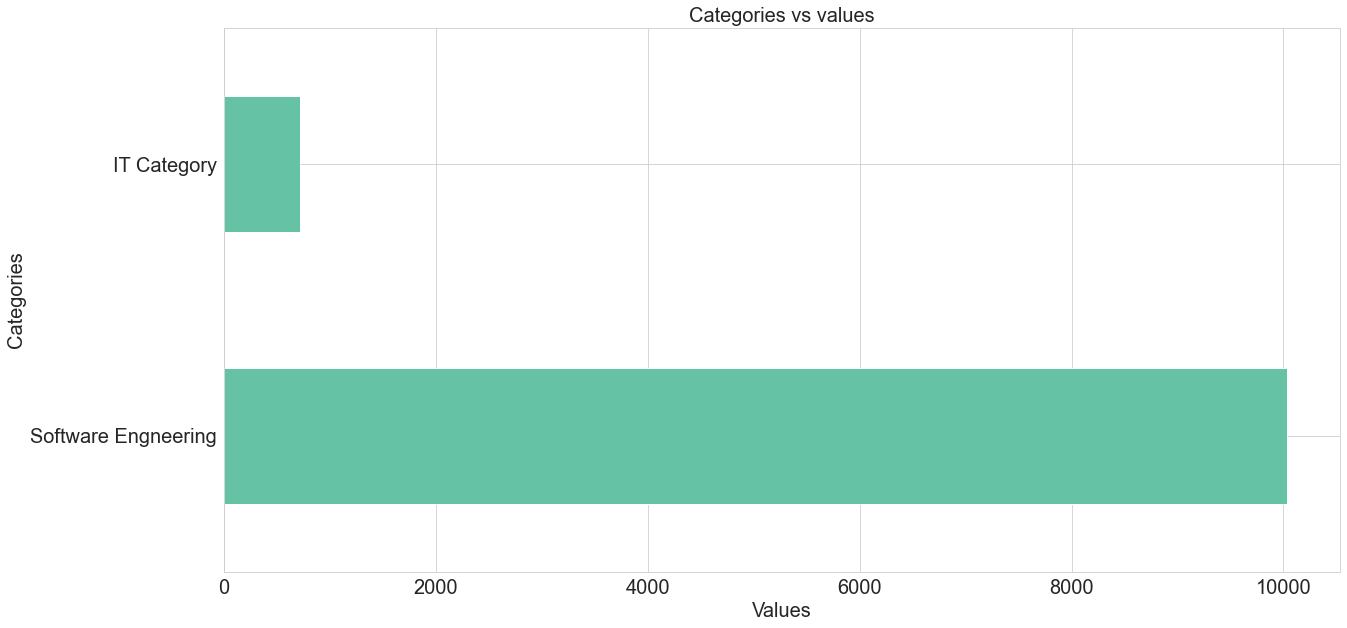

In [913]:
three_merged.category.value_counts().plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Set2')

#x axis label
plt.xlabel("Values",size=20)
plt.xticks(size=20)

#y axis label
plt.ylabel("Categories",size=20)
plt.yticks(size=20)

#plot label
plt.title("Categories vs values",size = 20)
sns.set_style("whitegrid")

## it's clean that software engneering is most needed job

# City Column

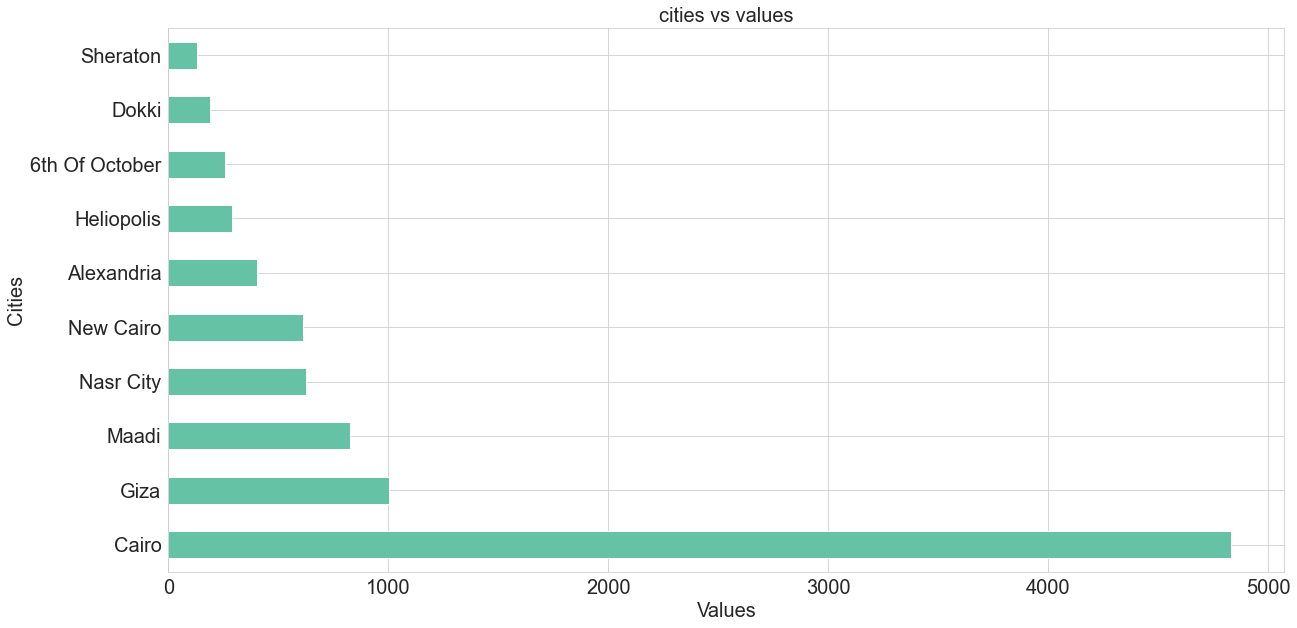

In [914]:
three_merged.city.value_counts()[:10].plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Set2')

#x axis label
plt.xlabel("Values",size=20)
plt.xticks(size=20)

#y axis label
plt.ylabel("Cities",size=20)
plt.yticks(size=20)

#plot label
plt.title("cities vs values",size = 20)
sns.set_style("whitegrid")

## all jobs are centered in cairo!

# EXP years Column

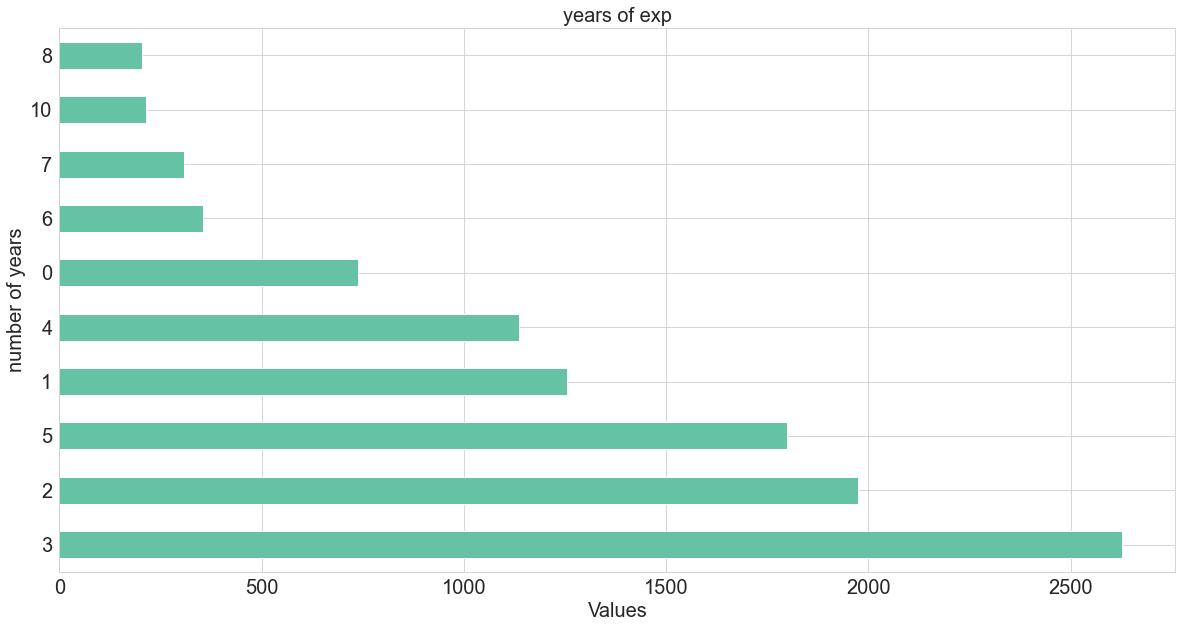

In [915]:
three_merged.exp_years.value_counts()[:10].plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Set2')

#x axis label
plt.xlabel("Values",size=20)
plt.xticks(size=20)

#y axis label
plt.ylabel("number of years",size=20)
plt.yticks(size=20)

#plot label
plt.title("years of exp",size = 20)
sns.set_style("whitegrid")

## we can say that the most repeated values: 3, 2, then 5

# Level Column

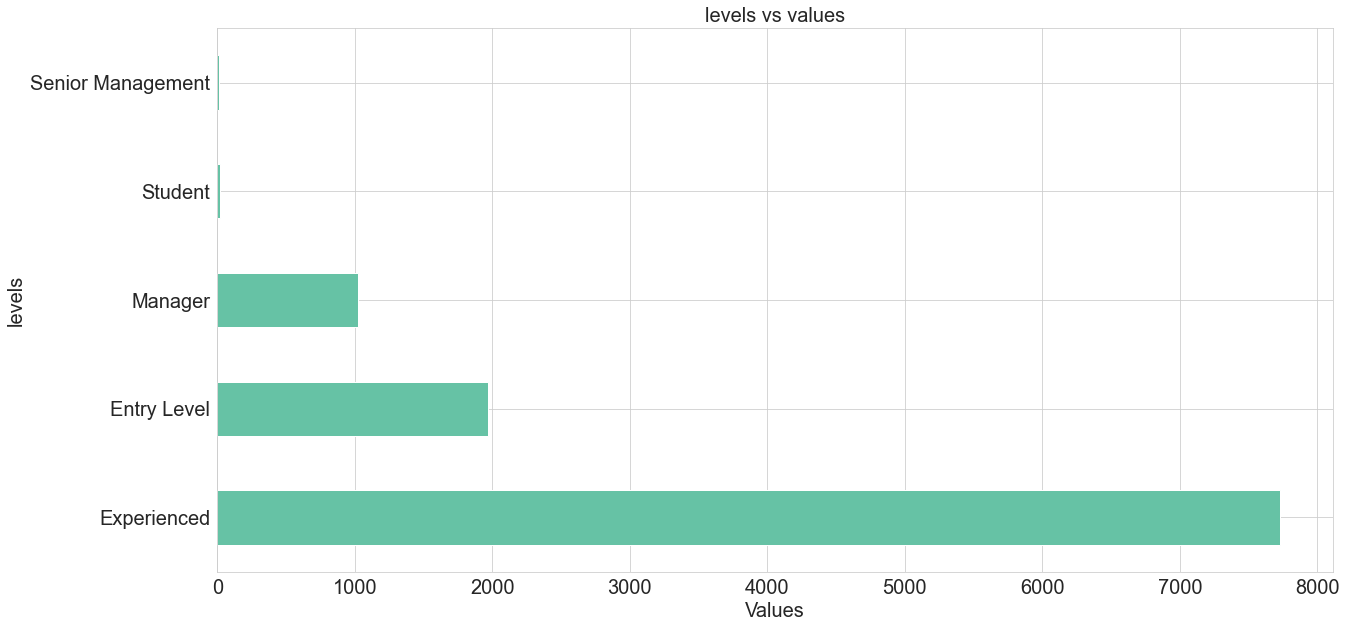

In [916]:
three_merged.level.value_counts()[:10].plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Set2')

#x axis label
plt.xlabel("Values",size=20)
plt.xticks(size=20)

#y axis label
plt.ylabel("levels",size=20)
plt.yticks(size=20)

#plot label
plt.title("levels vs values",size = 20)
sns.set_style("whitegrid")

## Experienced level is the most need

## Year Column

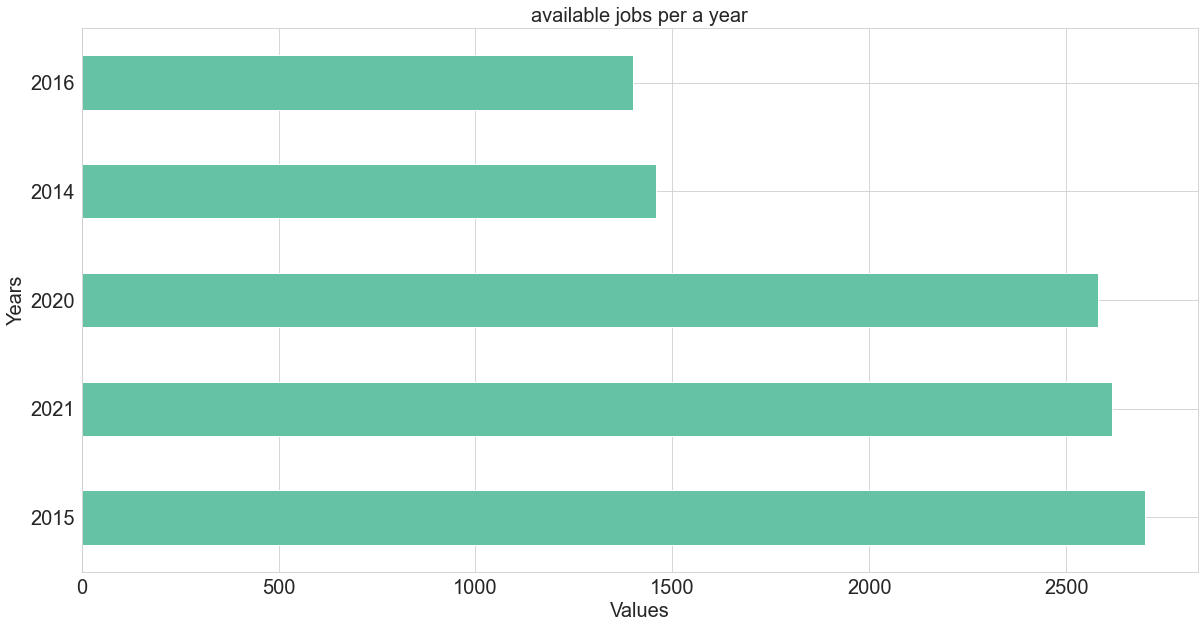

In [776]:
three_merged.year.value_counts()[:10].plot(kind= 'barh',figsize = (20,10),fontsize=15,colormap='Set2')

#x axis label
plt.xlabel("Values",size=20)
plt.xticks(size=20)

#y axis label
plt.ylabel("Years",size=20)
plt.yticks(size=20)

#plot label
plt.title("available jobs per a year",size = 20)   
sns.set_style("whitegrid")

## in this column we can say all values are near from each other, we can note 2020, 2021, 2015 tottaly the same number of available jobs